## Model Selection and Modeling

- [Linear Regression: OLS](#lm)
- [Lasso Regression](#lasso)
- [Random Forest Regression](#rfr)
- [Light Gradient Boosting Model With Bayesian Optimization](#lgbm)

### Import Necessary Modules and Datasets

In [1]:
# Import tools to get datasets
from zipfile import ZipFile
import urllib
import requests
import io

# Import modules for data reading and plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import all for model selections and modelling
from bayes_opt import BayesianOptimization
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

# Timer
import time

In [2]:
start = time.time() # Timer starts

Xtrainurl = 'https://github.com/jonahwinninghoff/Springboard_Capstone_Project/raw/main/Assets/X_train.zip'
Xvalidurl = 'https://github.com/jonahwinninghoff/Springboard_Capstone_Project/raw/main/Assets/X_valid.zip'
Xtestiurl = 'https://github.com/jonahwinninghoff/Springboard_Capstone_Project/raw/main/Assets/X_test.zip'

ytrainurl = 'https://github.com/jonahwinninghoff/Springboard_Capstone_Project/blob/main/Assets/y_train?raw=true'
yvalidurl = 'https://github.com/jonahwinninghoff/Springboard_Capstone_Project/blob/main/Assets/y_valid?raw=true'
ytestiurl = 'https://github.com/jonahwinninghoff/Springboard_Capstone_Project/blob/main/Assets/y_test?raw=true'

In [3]:
# Read X_train dataset
url = urllib.request.urlopen(Xtrainurl)
unzipfile = ZipFile(io.BytesIO(url.read()))
file = unzipfile.open("X_train")
X_train = pd.read_csv(file, encoding='cp1252').drop('Unnamed: 0', 
                                                    axis=1)
file.close()

# Read X_valid dataset
url = urllib.request.urlopen(Xvalidurl)
unzipfile = ZipFile(io.BytesIO(url.read()))
file = unzipfile.open("X_valid")
X_valid = pd.read_csv(file, encoding='cp1252').drop('Unnamed: 0', 
                                                    axis=1)
file.close()

# Read X_test dataset
url = urllib.request.urlopen(Xtestiurl)
unzipfile = ZipFile(io.BytesIO(url.read()))
file = unzipfile.open("X_test")
X_test = pd.read_csv(file, encoding='cp1252').drop('Unnamed: 0', 
                                                    axis=1)
file.close()

In [4]:
# Read y_train dataset
response = requests.get(ytrainurl)
response.raise_for_status()
y_train = np.load(io.BytesIO(response.content))

# Read y_valid dataset
response = requests.get(yvalidurl)
response.raise_for_status()
y_valid = np.load(io.BytesIO(response.content))

# Read y_test dataset
response = requests.get(ytestiurl)
response.raise_for_status()
y_test = np.load(io.BytesIO(response.content))

In [5]:
# Read X_TFIDF_train
url = urllib.request.urlopen('https://github.com/jonahwinninghoff/Springboard_Capstone_Project/blob/main/Assets/X_TFIDF_train.zip?raw=true')
unzipfile = ZipFile(io.BytesIO(url.read()))
file = unzipfile.open("X_TFIDF_train")
X_TFIDF_train = pd.read_csv(file, encoding='cp1252').drop('Unnamed: 0', 
                                                    axis=1)
file.close()

# Read X_TFIDF_valid
url = urllib.request.urlopen('https://github.com/jonahwinninghoff/Springboard_Capstone_Project/blob/main/Assets/X_TFIDF_valid.zip?raw=true')
unzipfile = ZipFile(io.BytesIO(url.read()))
file = unzipfile.open("X_TFIDF_valid")
X_TFIDF_valid = pd.read_csv(file, encoding='cp1252').drop('Unnamed: 0', 
                                                    axis=1)
file.close()

# Read X_TFIDF_test
url = urllib.request.urlopen('https://github.com/jonahwinninghoff/Springboard_Capstone_Project/blob/main/Assets/X_TFIDF_test.zip?raw=true')
unzipfile = ZipFile(io.BytesIO(url.read()))
file = unzipfile.open("X_TFIDF_test")
X_TFIDF_test = pd.read_csv(file, encoding='cp1252').drop('Unnamed: 0', 
                                                    axis=1)
file.close()

In [6]:
display(X_TFIDF_train.head())

,ability,activities,antianxiety,antipsychotic,appropriately,assessed,bladder,bowels,catheter,control,...,risk,seasonal,short,symptoms,tract,ulcers,urinary,vaccine,weight,worsened
0,0.0,0.0,0.0,0.0,0.410134,0.410134,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.410134,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.420905,0.0,0.000000,0.0,0.0,0.514482,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.414597,0.0,0.516965,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.384065,0.384065,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.404843,0.0,0.0,0.000000,0.0,0.384065,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [7]:
display(X_train.head())

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_39,pc_40,pc_41,pc_42,pc_43,pc_44,pc_45,pc_46,pc_47,pc_48
0,0.660904,0.020100,0.044738,0.026935,-0.086106,0.066239,-0.099660,0.012499,0.004524,0.011040,...,-1.318443e-17,-5.534612e-17,5.331652e-17,4.521988e-17,2.701118e-17,3.721016e-17,3.798447e-17,-2.949072e-18,-5.659986e-18,-2.698157e-17
1,-0.230752,-0.269446,0.206676,-0.059364,0.588827,0.536291,-0.178171,-0.045429,-0.243858,-0.003194,...,1.706481e-17,4.385838e-17,9.343200e-17,-1.292393e-18,8.989491e-17,-1.310580e-16,-4.150333e-18,1.729439e-17,-2.413300e-17,-4.953298e-17
2,-0.209060,-0.212579,0.097886,-0.008835,0.004231,-0.063156,0.042141,0.035324,0.809934,0.002881,...,-3.844634e-17,4.732783e-17,-9.565286e-17,-6.027299e-17,-6.189339e-17,6.670046e-17,-1.279662e-16,6.886053e-18,1.056147e-17,-1.085136e-16
3,0.699247,0.077719,0.018114,-0.017220,0.047612,-0.035646,0.069493,-0.018699,-0.010775,-0.016971,...,4.330250e-17,4.234050e-17,4.527424e-18,-4.547363e-17,8.633957e-18,-1.006105e-17,-1.911232e-17,1.849295e-18,-8.714250e-18,7.712897e-18
4,-0.134388,-0.073403,-0.055115,0.002297,0.009668,-0.013379,-0.004968,0.018567,0.004221,0.028316,...,9.859681e-17,1.089863e-17,-7.657090e-17,-7.363926e-18,4.045529e-17,1.638450e-16,-1.925847e-16,-5.284049e-20,-6.785768e-18,-1.674942e-16


In [8]:
print(X_TFIDF_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141159 entries, 0 to 141158
Data columns (total 49 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ability        141159 non-null  float64
 1   activities     141159 non-null  float64
 2   antianxiety    141159 non-null  float64
 3   antipsychotic  141159 non-null  float64
 4   appropriately  141159 non-null  float64
 5   assessed       141159 non-null  float64
 6   bladder        141159 non-null  float64
 7   bowels         141159 non-null  float64
 8   catheter       141159 non-null  float64
 9   control        141159 non-null  float64
 10  daily          141159 non-null  float64
 11  depressive     141159 non-null  float64
 12  experiencing   141159 non-null  float64
 13  falls          141159 non-null  float64
 14  function       141159 non-null  float64
 15  given          141159 non-null  float64
 16  help           141159 non-null  float64
 17  high           141159 non-nul

In [9]:
print(X_TFIDF_train.shape)
print(X_train.shape)

(141159, 49)
(141159, 49)


### Linear Regression: OLS <a id ='lm'></a>

In [10]:
X_TFIDF_train_wconstant = sm.add_constant(X_TFIDF_train)
model = sm.OLS(y_train,X_TFIDF_train_wconstant)
TFIDF_fitted_lm = model.fit()

display(TFIDF_fitted_lm.summary())

/Users/jonahwinninghoff/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 8.341e+04
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:23:00   Log-Likelihood:             1.1010e+05
No. Observations:              141159   AIC:                        -2.202e+05
Df Residuals:                  141141   BIC:                        -2.200e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.1344      0.346     17.731      0.000       5.456       6.812
ability       -2.687e+10    2.4e+10     -1.119      0.263   -7.39e+10    2.02e+10
activities    -5.969e+09   5.24e+10     -0.114      0.909   -1.09e+11    9.68e+10
antianxiety    2.931e+10      3e+10      0.977      0.329   -2.95e+10    8.81e+10
antipsychotic  3.539e+10   3.57e+10      0.992      0.321   -3.45e+10    1.05e+11
appropriately  -3.28e+10   2.19e+10     -1.496      0.135   -7.58e+10    1.02e+10
assessed      -2.656e+10   2.39e+10     -1.112      0.266   -7.34e+10    2.02e+10
bladder       -1.863e+11   9.71e+10     -1.919      0.055   -3.77e+11       4e+09
bowels          1.28e+11   4.03e+10      3.177      0.001     4.9e+10    2.07e+11
catheter       2.363e+11   1.25e+11      1.888      0.059      -9e+09    4.82e+11
control        1.105e+11    4.3e+10      2.567      0.010    2.61e+10    1.95e+11
daily          1.695e+10    2.4e+10      0.705      0.481   -3.02e+10    6.41e+10
depressive    -3.816e+09   5.32e+10     -0.072      0.943   -1.08e+11       1e+11
experiencing   1.003e+10   1.29e+11      0.078      0.938   -2.43e+11    2.63e+11
falls          1.492e+10   1.33e+11      0.112      0.911   -2.46e+11    2.76e+11
function      -6.604e+09    2.6e+10     -0.254      0.799   -5.76e+10    4.43e+10
given          1.794e+09   3.75e+10      0.048      0.962   -7.17e+10    7.53e+10
help          -8.142e+08   1.36e+10     -0.060      0.952   -2.75e+10    2.59e+10
high           1.541e+10      2e+10      0.769      0.442   -2.39e+10    5.47e+10
hypnotic       1.279e+09   4.76e+10      0.027      0.979    -9.2e+10    9.45e+10
improvements   1.276e+10    2.4e+10      0.531      0.595   -3.43e+10    5.98e+10
increased     -1.884e+09   1.38e+10     -0.136      0.892    -2.9e+10    2.52e+10
independently  1.602e+10   1.34e+10      1.194      0.232   -1.03e+10    4.23e+10
infection      7.501e+09   1.28e+10      0.584      0.559   -1.77e+10    3.27e+10
influenza      3.383e+10   3.85e+10      0.880      0.379   -4.16e+10    1.09e+11
injury        -9.985e+09    1.3e+11     -0.077      0.939   -2.65e+11    2.45e+11
inserted      -4.024e+10   2.74e+10     -1.467      0.142    -9.4e+10    1.35e+10
left          -4.056e+10   2.76e+10     -1.472      0.141   -9.46e+10    1.35e+10
long          -1.934e+10   3.52e+10     -0.550      0.582   -8.83e+10    4.96e+10
lose          -4.741e+09   2.83e+10     -0.168      0.867   -6.02e+10    5.07e+10
low           -3.906e+10   3.46e+10     -1.129      0.259   -1.07e+11    2.88e+10
major          -8.66e+09   1.23e+11     -0.071      0.944   -2.49e+11    2.32e+11
medication    -1.634e+10   2.17e+10     -0.752      0.452   -5.89e+10    2.62e+10
need          -1.867e+09   1.38e+10     -0.135      0.892   -2.89e+10    2.52e+10
newly            -2.1135      0.118    -17.986   

In [11]:
# Create the evaluation using r^2 as a guide
def lm_eval(n_components):
    pca_train = X_train.iloc[:,0:n_components].copy()
    X_train_wconstant = sm.add_constant(pca_train)
    model = sm.OLS(y_train,X_train_wconstant)
    fitted_lm = model.fit()
    return fitted_lm.rsquared

components = {}
for i in enumerate(X_train.columns):
    result = [lm_eval(i[0])]
    components[i[1]] = result

/Users/jonahwinninghoff/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


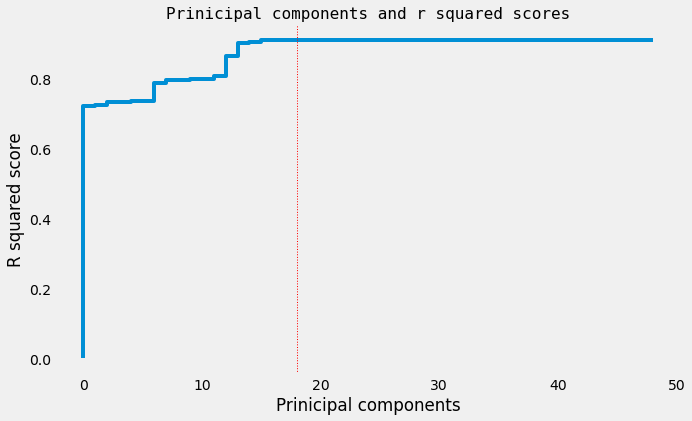

In [12]:
# Pandas Frame on components and find max accuracy of n components
components = pd.DataFrame(components).melt()
max_components = components[components['value'] == np.max(components['value'])].index[0]

# Step plot
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(10, 6))
plt.plot(components['value'],drawstyle='steps')
plt.axvline(max_components, linestyle=':',color='red',linewidth=1)
plt.xlabel('Prinicipal components')
plt.ylabel('R squared score')
plt.title('Prinicipal components and r squared scores', family='monospace',fontsize=16)
plt.grid(False)
plt.show()

In [13]:
# Reduce from 49 columns to n_components columns
pca_train = X_train.iloc[:,0:max_components]
pca_valid = X_valid.iloc[:,0:max_components]
pca_test = X_test.iloc[:,0:max_components]

# Fit the best lm
X_train_wconstant = sm.add_constant(pca_train)
model = sm.OLS(y_train,X_train_wconstant)
fitted_lm = model.fit()

display(fitted_lm.summary())

/Users/jonahwinninghoff/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 8.342e+04
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:23:15   Log-Likelihood:             1.1011e+05
No. Observations:              141159   AIC:                        -2.202e+05
Df Residuals:                  141141   BIC:                        -2.200e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3573      0.000   1210.121      0.000       0.357       0.358
pc_0           0.7746      0.001   1061.483      0.000       0.773       0.776
pc_1           0.0366      0.001     38.903      0.000       0.035       0.038
pc_2           0.1458      0.001    129.100      0.000       0.144       0.148
pc_3          -0.0082      0.001     -6.848      0.000      -0.011      -0.006
pc_4           0.0745      0.001     61.464      0.000       0.072       0.077
pc_5          -0.0313      0.001    -25.601      0.000      -0.034      -0.029
pc_6           0.3433      0.001    279.164      0.000       0.341       0.346
pc_7          -0.1487      0.001   -117.495      0.000      -0.151      -0.146
pc_8          -0.0023      0.001     -1.769      0.077      -0.005       0.000
pc_9          -0.0821      0.001    -60.887      0.000      -0.085      -0.079
pc_10         -0.0177      0.001    -12.552      0.000      -0.021      -0.015
pc_11          0.1630      0.001    110.376      0.000       0.160       0.166
pc_12          0.4478      0.001    299.796      0.000       0.445       0.451
pc_13         -0.5653      0.002   -247.225      0.000      -0.570      -0.561
pc_14         -0.1624      0.004    -44.051      0.000      -0.170      -0.155
pc_15         -0.3522      0.004    -87.762      0.000      -0.360      -0.344
pc_16        -18.7512      1.098    -17.081      0.000     -20.903     -16.600
pc_17       9.171e-13   5.37e-14     17.088      0.000    8.12e-13    1.02e-12
==============================================================================
Omnibus:                    39551.775   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           602320.938
Skew:                          -0.937   Prob(JB):                         0.00
Kurtosis:                      12.944   Cond. No.                     1.18e+28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-51. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The OLS with TFIDF vectorization shows that a few variables are statistically significant at two-sided 5% alpha level. The Akaike and Bayesian Information Criterions (AIC and BIC) are −0.98 and −0.977. The R-squared score is 90.9%. The adjusted R-squared score shows that the number of parameters has little impact on the percentage of the target variable variation that this model explains. When the number of features reduces using cosine similarities, each variable is satistically significant at two-sided 1% alpha level, and AIC and BIC are lower. However, the R-squared score is 69.9, and the adjusted R-squared score is same. 

The kurtosis score lowers but it is still leptokurtotic. The skewness for OLS with TFIDF vectorization is extremely negative. When the cosine similarites are applied, the skewness shifts to postive or right skewness.

In [14]:
X_valid_wconstant = sm.add_constant(pca_valid)
y_predicted = fitted_lm.predict(X_valid_wconstant)

X_TFIDF_valid_wconstant = sm.add_constant(X_TFIDF_valid)
y_TFIDF_predicted = TFIDF_fitted_lm.predict(X_TFIDF_valid_wconstant)

/Users/jonahwinninghoff/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
def r2_calculator(predict, true):
    merged = pd.concat([pd.DataFrame(list(predict)).rename(columns={0:'predicted'}), 
           pd.DataFrame(list(true)).rename(columns={0:'true'})],axis=1)
    
    # 1 - (predict - true)^2/(true - mean(true))^2 = 1 - RSS/TSS = r_2
    r2 = 1 - sum((merged['predicted'] - merged['true'])**2)/sum((merged['true'] - np.mean(merged['true']))**2)
    
    return r2

def adjusted_r2_calculator(predict, true):
    r2 = r2_calculator(predict, true) # r_2
    n = len(true)                     # number of rows
    k = len(fitted_lm.params)         # number of parameters
    
    adj_r2 = 1 - ((1-r2)*(n-1))/(n-k-1)    # 1 - [(1 - r_2)*(n - 1)/(n - k - 1)] = adjusted r^2
    
    return adj_r2

def mae_and_mse_calculator(predict, true):
    merged = pd.concat([pd.DataFrame(list(predict)).rename(columns={0:'predicted'}), 
           pd.DataFrame(list(true)).rename(columns={0:'true'})],axis=1)
    mae = sum(np.abs(merged['true'] - merged['predicted']))/len(true) # 1/n ∑ |true - predict|   = MAE
    mse = sum((merged['true'] - merged['predicted'])**2)/len(true)    # 1/n ∑ (true - predict)^2 = MSE
    
    return mae, mse

In [16]:
print('Validation Set')
print('R2: '+str(round(r2_calculator(y_TFIDF_predicted, y_valid),4)))
print('Adjusted R2: '+str(round(adjusted_r2_calculator(y_TFIDF_predicted,y_valid),4)))
print('MAE: '+ str(round(mae_and_mse_calculator(y_TFIDF_predicted,y_valid)[0],4)))
print('RMSE: '+ str(round(mae_and_mse_calculator(y_TFIDF_predicted,y_valid)[1]**0.5,4)))

Validation Set
R2: 0.9091
Adjusted R2: 0.9091
MAE: 0.0686
RMSE: 0.1107


In [17]:
print('Validation Set with PCA')
print('R2: '+str(round(r2_calculator(y_predicted, y_valid),4)))
print('Adjusted R2: '+str(round(adjusted_r2_calculator(y_predicted,y_valid),4)))
print('MAE: '+ str(round(mae_and_mse_calculator(y_predicted,y_valid)[0],4)))
print('RMSE: '+ str(round(mae_and_mse_calculator(y_predicted,y_valid)[1]**0.5,4)))

Validation Set with PCA
R2: 0.9091
Adjusted R2: 0.9091
MAE: 0.0687
RMSE: 0.1107


When the model with either TFIDF vectorization or PCA is being generalized using validation set, it is already at highest accuracy and lowest loss.

### Lasso Regression <a id = 'lasso'></a>

In [18]:
# Optimize Lasso with TFIDF model
def lasso_eval(alpha):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_TFIDF_train,y_train)
    
    return r2_calculator(lasso.predict(X_TFIDF_valid),y_valid)
    

# Instantiate Bayesian Optimization   
TFIDF_lassoBO = BayesianOptimization(lasso_eval, {'alpha':(0.01,1)})
TFIDF_lassoBO.maximize(n_iter=20, init_points=2)

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -7.81e-05 |  0.1131   |
|  2        | -7.81e-05 |  0.129    |
|  3        | -7.81e-05 |  1.0      |
|  4        | -7.81e-05 |  1.0      |
|  5        |  0.7454   |  0.01007  |
|  6        |  0.3204   |  0.03734  |
|  7        | -7.81e-05 |  0.5624   |
|  8        | -7.81e-05 |  0.3436   |
|  9        |  0.6187   |  0.01727  |
|  10       | -7.81e-05 |  0.7812   |
|  11       | -7.81e-05 |  0.4531   |
|  12       | -7.81e-05 |  0.6716   |
|  13       | -7.81e-05 |  0.8904   |
|  14       | -7.81e-05 |  0.2348   |
|  15       |  0.7464   |  0.01     |
|  16       |  0.7464   |  0.01     |
|  17       |  0.7464   |  0.01     |
|  18       |  0.7464   |  0.01     |
|  19       |  0.7464   |  0.01     |
|  20       |  0.7464   |  0.01     |
|  21       |  0.7464   |  0.01     |
|  22       |  0.7464   |  0.01     |


In [19]:
# Optimize Lasso with TFIDF model
def lasso_eval(alpha):
    lasso = Lasso(alpha=alpha)
    lasso.fit(pca_train,y_train)
    
    return r2_calculator(lasso.predict(pca_valid),y_valid)
    

# Instantiate Bayesian Optimization   
lassoBO = BayesianOptimization(lasso_eval, {'alpha':(0.01,1)})
lassoBO.maximize(n_iter=20, init_points=2)

|   iter    |  target   |   alpha   |
-------------------------------------
|  1        | -7.81e-05 |  0.7301   |
|  2        | -7.81e-05 |  0.9577   |
|  3        |  0.7925   |  0.01     |
|  4        | -7.81e-05 |  0.2228   |
|  5        |  0.7925   |  0.01001  |
|  6        |  0.5473   |  0.06197  |
|  7        | -7.81e-05 |  0.4846   |
|  8        |  0.7926   |  0.01     |
|  9        |  0.7926   |  0.01     |
|  10       |  0.7926   |  0.01     |
|  11       |  0.7926   |  0.01     |
|  12       |  0.7926   |  0.01     |
|  13       |  0.7926   |  0.01     |
|  14       |  0.7926   |  0.01     |
|  15       |  0.7926   |  0.01     |
|  16       |  0.7926   |  0.01     |
|  17       |  0.7926   |  0.01     |
|  18       |  0.7926   |  0.01     |
|  19       |  0.7926   |  0.01     |
|  20       |  0.7926   |  0.01     |
|  21       |  0.7926   |  0.01     |
|  22       |  0.7926   |  0.01     |


In [20]:
# Fit best models with and without PCA
TFIDF_lasso = Lasso(alpha = TFIDF_lassoBO.max['params']['alpha'])
TFIDF_lasso.fit(X_TFIDF_train, y_train.ravel())

lasso = Lasso(alpha = lassoBO.max['params']['alpha'])
lasso.fit(pca_train, y_train.ravel())

Lasso(alpha=0.01)

In [21]:
print('Validation Set')
print('R2: '+str(round(r2_calculator(TFIDF_lasso.predict(X_TFIDF_valid), y_valid),4)))
print('Adjusted R2: '+str(round(adjusted_r2_calculator(TFIDF_lasso.predict(X_TFIDF_valid),y_valid),4)))
print('MAE: '+ str(round(mae_and_mse_calculator(TFIDF_lasso.predict(X_TFIDF_valid),y_valid)[0],4)))
print('RMSE: '+ str(round(mae_and_mse_calculator(TFIDF_lasso.predict(X_TFIDF_valid),y_valid)[1]**0.5,4)))

Validation Set
R2: 0.7464
Adjusted R2: 0.7463
MAE: 0.1552
RMSE: 0.1849


In [22]:
print('Validation Set with PCA')
print('R2: '+str(round(r2_calculator(lasso.predict(pca_valid), y_valid),4)))
print('Adjusted R2: '+str(round(adjusted_r2_calculator(lasso.predict(pca_valid),y_valid),4)))
print('MAE: '+ str(round(mae_and_mse_calculator(lasso.predict(pca_valid),y_valid)[0],4)))
print('RMSE: '+ str(round(mae_and_mse_calculator(lasso.predict(pca_valid),y_valid)[1]**0.5,4)))

Validation Set with PCA
R2: 0.7926
Adjusted R2: 0.7925
MAE: 0.1329
RMSE: 0.1673


### Random Forest Regression <a id='rfr'></a>

In [23]:
TFIDF_rfr_model = RandomForestRegressor()
TFIDF_rfr_model.fit(X_TFIDF_train, y_train.ravel())

rfr_model = RandomForestRegressor()
rfr_model.fit(pca_train, y_train.ravel())

RandomForestRegressor()

In [24]:
print('Validation Set')
print('R2: ' + str(round(r2_calculator(TFIDF_rfr_model.predict(X_TFIDF_valid),y_valid),4)))
print('Adjusted R2: ' + str(round(adjusted_r2_calculator(TFIDF_rfr_model.predict(X_TFIDF_valid),y_valid),4)))
print('MAE: ' + str(round(mae_and_mse_calculator(TFIDF_rfr_model.predict(X_TFIDF_valid),y_valid)[0],4)))
print('RMSE: ' + str(round(mae_and_mse_calculator(TFIDF_rfr_model.predict(X_TFIDF_valid),y_valid)[1]**0.5,4)))

Validation Set
R2: 0.9091
Adjusted R2: 0.9091
MAE: 0.0687
RMSE: 0.1107


In [25]:
print('Validation Set with PCA')
print('R2: ' + str(round(r2_calculator(rfr_model.predict(pca_valid),y_valid),4)))
print('Adjusted R2: ' + str(round(adjusted_r2_calculator(rfr_model.predict(pca_valid),y_valid),4)))
print('MAE: ' + str(round(mae_and_mse_calculator(rfr_model.predict(pca_valid),y_valid)[0],4)))
print('RMSE: ' + str(round(mae_and_mse_calculator(rfr_model.predict(pca_valid),y_valid)[1]**0.5,4)))

Validation Set with PCA
R2: 0.9091
Adjusted R2: 0.9091
MAE: 0.0687
RMSE: 0.1107


The result is identical even with different model.

### Light Gradient Boosting Model With Bayesian Optimization <a id='lgbm'></a>

In [26]:
def lgbm_eval(lambda_l2,lambda_l1,max_depth,learning_rate,n_estimators):
    lgbm_model = LGBMRegressor(lambda_l2 = lambda_l2, lambda_l1 = lambda_l1, 
                               max_depth = int(round(max_depth,0)),
                               learning_rate = learning_rate, 
                               n_estimators = int(round(n_estimators,0)))
    
    lgbm_model.fit(pca_train, y_train.ravel())
    return r2_calculator(lgbm_model.predict(pca_valid),y_valid)

In [27]:
lgbmBO = BayesianOptimization(lgbm_eval, {'lambda_l2':(0, 0.5),
                                          'lambda_l1':(0,0.5),
                                          'max_depth':(-1,6),
                                          'learning_rate':(0.01,0.5),
                                          'n_estimators':(10,200)})

lgbmBO.maximize(n_iter=20, init_points=2)

|   iter    |  target   | lambda_l1 | lambda_l2 | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------------------
|  1        |  0.9091   |  0.1454   |  0.2879   |  0.469    |  1.65     |  108.2    |
|  2        |  0.9091   |  0.106    |  0.3295   |  0.3927   |  4.273    |  101.7    |
|  3        |  0.9091   |  0.006879 |  0.1733   |  0.4625   | -0.4839   |  174.2    |
|  4        |  0.9091   |  0.4807   |  0.3549   |  0.4336   |  1.986    |  109.4    |
|  5        |  0.9091   |  0.297    |  0.1272   |  0.1949   | -0.9917   |  175.6    |
|  6        |  0.9091   |  0.3857   |  0.3425   |  0.4981   |  4.704    |  161.6    |
|  7        |  0.9071   |  0.4451   |  0.009344 |  0.02166  |  4.295    |  139.1    |
|  8        |  0.9091   |  0.4504   |  0.2243   |  0.2057   |  5.505    |  65.62    |
|  9        |  0.9091   |  0.3701   |  0.1825   |  0.1444   | -0.2648   |  36.37    |
|  10       |  0.8497   |  0.4633   |  0.331    |  0.1

In [28]:
def TFIDF_lgbm_eval(lambda_l2,lambda_l1,max_depth,learning_rate,n_estimators):
    lgbm_model = LGBMRegressor(lambda_l2 = lambda_l2, lambda_l1 = lambda_l1, 
                               max_depth = int(round(max_depth,0)),
                               learning_rate = learning_rate, 
                               n_estimators = int(round(n_estimators,0)))
    
    lgbm_model.fit(X_TFIDF_train, y_train.ravel())
    return r2_calculator(lgbm_model.predict(X_TFIDF_valid),y_valid)

In [29]:
TFIDF_lgbmBO = BayesianOptimization(TFIDF_lgbm_eval, {'lambda_l2':(0, 0.5),
                                          'lambda_l1':(0,0.5),
                                          'max_depth':(-1,6),
                                          'learning_rate':(0.01,0.5),
                                          'n_estimators':(10,200)})

TFIDF_lgbmBO.maximize(n_iter=20, init_points=2)

|   iter    |  target   | lambda_l1 | lambda_l2 | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------------------
|  1        |  0.8702   |  0.3884   |  0.2732   |  0.07349  |  0.5105   |  93.48    |
|  2        |  0.9091   |  0.196    |  0.2506   |  0.3807   |  3.377    |  45.87    |
|  3        |  0.7691   |  0.2743   |  0.1114   |  0.02133  |  2.794    |  46.99    |
|  4        |  0.9091   |  0.1096   |  0.1629   |  0.293    |  3.041    |  173.2    |
|  5        |  0.9091   |  0.3473   |  0.086    |  0.4945   |  1.21     |  170.3    |
|  6        |  0.9091   |  0.1605   |  0.3569   |  0.2786   |  1.156    |  190.9    |
|  7        |  0.9088   |  0.3337   |  0.1919   |  0.05295  |  2.79     |  165.5    |
|  8        |  0.8955   |  0.08018  |  0.4626   |  0.2297   |  1.014    |  52.08    |
|  9        |  0.9091   |  0.1093   |  0.3295   |  0.3185   |  3.392    |  45.66    |
|  10       |  0.9091   |  0.1165   |  0.3487   |  0.4

In [30]:
print(lgbmBO.max['params'])
print(TFIDF_lgbmBO.max['params'])

{'lambda_l1': 0.23919026602832588, 'lambda_l2': 0.3627241902938171, 'learning_rate': 0.19571053687205453, 'max_depth': 5.993480211264609, 'n_estimators': 46.39378407684369}
{'lambda_l1': 0.28525283908447346, 'lambda_l2': 0.33317168991051427, 'learning_rate': 0.46829356000044503, 'max_depth': 3.218928149681375, 'n_estimators': 172.0227938688183}


In [31]:
lgbm_model = LGBMRegressor(lambda_l2 = lgbmBO.max['params']['lambda_l1'],
                           lambda_l1 = lgbmBO.max['params']['lambda_l2'],
                           max_depth = int(round(lgbmBO.max['params']['max_depth'],0)),
                           learning_rate = lgbmBO.max['params']['learning_rate'],
                           n_estimators = int(round(lgbmBO.max['params']['n_estimators'],0)))
lgbm_model.fit(pca_train, y_train.ravel())

LGBMRegressor(lambda_l1=0.3627241902938171, lambda_l2=0.23919026602832588,
              learning_rate=0.19571053687205453, max_depth=6, n_estimators=46)

In [32]:
TFIDF_lgbm_model = LGBMRegressor(lambda_l2 = TFIDF_lgbmBO.max['params']['lambda_l1'],
                           lambda_l1 = TFIDF_lgbmBO.max['params']['lambda_l2'],
                           max_depth = int(round(TFIDF_lgbmBO.max['params']['max_depth'],0)),
                           learning_rate = TFIDF_lgbmBO.max['params']['learning_rate'],
                           n_estimators = int(round(TFIDF_lgbmBO.max['params']['n_estimators'],0)))
TFIDF_lgbm_model.fit(X_TFIDF_train, y_train.ravel())

LGBMRegressor(lambda_l1=0.33317168991051427, lambda_l2=0.28525283908447346,
              learning_rate=0.46829356000044503, max_depth=3, n_estimators=172)

In [33]:
print('Validation Set')
print('R2: ' + str(round(r2_calculator(TFIDF_lgbm_model.predict(X_TFIDF_valid),y_valid),4)))
print('Adjusted R2: ' + str(round(adjusted_r2_calculator(TFIDF_lgbm_model.predict(X_TFIDF_valid),y_valid),4)))
print('MAE: ' + str(round(mae_and_mse_calculator(TFIDF_lgbm_model.predict(X_TFIDF_valid),y_valid)[0],4)))
print('RMSE: ' + str(round(mae_and_mse_calculator(TFIDF_lgbm_model.predict(X_TFIDF_valid),y_valid)[1]**0.5,4)))

Validation Set
R2: 0.9091
Adjusted R2: 0.9091
MAE: 0.0687
RMSE: 0.1107


In [34]:
print('Validation Set with PCA')
print('R2: ' + str(round(r2_calculator(lgbm_model.predict(pca_valid),y_valid),4)))
print('Adjusted R2: ' + str(round(adjusted_r2_calculator(lgbm_model.predict(pca_valid),y_valid),4)))
print('MAE: ' + str(round(mae_and_mse_calculator(lgbm_model.predict(pca_valid),y_valid)[0],4)))
print('RMSE: ' + str(round(mae_and_mse_calculator(lgbm_model.predict(pca_valid),y_valid)[1]**0.5,4)))

Validation Set with PCA
R2: 0.9091
Adjusted R2: 0.9091
MAE: 0.0687
RMSE: 0.1107


When the hyperparameter search completes, the result indicates that the error is irreducible. Two ways to reduce this error are feature engineering and data wrangling. Besides this, the random forest model is top choice for this problem because this model is more resistant to overfitting. 

In [35]:
print('Testing Set with PCA')
print('R2: ' + str(round(r2_calculator(rfr_model.predict(pca_test),y_test),4)))
print('Adjusted R2: ' + str(round(adjusted_r2_calculator(rfr_model.predict(pca_test),y_test),4)))
print('MAE: ' + str(round(mae_and_mse_calculator(rfr_model.predict(pca_test),y_test)[0],4)))
print('RMSE: ' + str(round(mae_and_mse_calculator(rfr_model.predict(pca_test),y_test)[1]**0.5,4)))

Testing Set with PCA
R2: 0.9097
Adjusted R2: 0.9097
MAE: 0.0685
RMSE: 0.1106


In [36]:
print(f'Time taken to run: {time.time() - start} seconds')

Time taken to run: 140.35292172431946 seconds
